In [1]:
!git clone https://github.com/Ryanshuai/BM3D_py.git
!git clone https://github.com/csjunxu/PolyU-Real-World-Noisy-Images-Dataset.git
!git clone https://github.com/heartyguy/ml-image-denoising.git
!pip3 install PyWavelets

Cloning into 'BM3D_py'...
remote: Enumerating objects: 834, done.
remote: Counting objects: 100% (834/834), done.
remote: Compressing objects: 100% (784/784), done.
remote: Total 3258 (delta 89), reused 766 (delta 47), pack-reused 2424
Receiving objects: 100% (3258/3258), 177.29 MiB | 40.71 MiB/s, done.
Resolving deltas: 100% (348/348), done.
Cloning into 'PolyU-Real-World-Noisy-Images-Dataset'...
remote: Enumerating objects: 416, done.
remote: Total 416 (delta 0), reused 0 (delta 0), pack-reused 416
Receiving objects: 100% (416/416), 138.10 MiB | 48.00 MiB/s, done.
Resolving deltas: 100% (84/84), done.
Cloning into 'ml-image-denoising'...
remote: Enumerating objects: 127, done.
remote: Counting objects: 100% (127/127), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 127 (delta 28), reused 127 (delta 28), pack-reused 0
Receiving objects: 100% (127/127), 173.29 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [1]:
import sys

In [2]:
sys.path.append('BM3D_py')

In [3]:
from utils import add_gaussian_noise, symetrize
from bm3d import run_bm3d
from bm3d_1st_step import bm3d_1st_step
from psnr import compute_psnr
import cv2

In [4]:
# hyperparams bm3d

n_H = 16
k_H = 8
N_H = 16
p_H = 3
lambda3D_H = 2.7  # ! Threshold for Hard Thresholding
useSD_H = False
tau_2D_H = 'BIOR'

n_W = 16
k_W = 8
N_W = 32
p_W = 3
useSD_W = True
tau_2D_W = 'DCT'

In [5]:
# hyperparams bm3d first step

sigma = 20

nHard = 16
kHard = 8
NHard = 16
pHard = 3
lambdaHard3D = 2.7  # ! Threshold for Hard Thresholding
tauMatchHard = 2500 if sigma < 35 else 5000  # ! threshold determinates similarity between patches
useSD_h = False
tau_2D_hard = 'BIOR'

In [6]:
images = [
    # path noized, path gt
    ['Lena sigma 80', 'BM3D_py/test_data/sigma80/Lena.png', 'BM3D_py/test_data/image/Lena.png'],
    ['Lena sigma 10', 'BM3D_py/test_data/sigma10/Lena.png', 'BM3D_py/test_data/image/Lena.png'],
    ['Sony_4-5_125_3200_plant_13', 'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Sony_4-5_125_3200_plant_13_real.JPG',
            'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Sony_4-5_125_3200_plant_13_mean.JPG'],
    ['Sony_4-5_125_3200_plant_10', 'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Sony_4-5_125_3200_plant_10_real.JPG',
            'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Sony_4-5_125_3200_plant_10_mean.JPG'],
    ['Canon5D2_5_160_6400_circuit_11', 'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Canon5D2_5_160_6400_circuit_11_real.JPG',
            'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Canon5D2_5_160_6400_circuit_11_mean.JPG'],
    ['NikonD800_10_100_6400_planandsofa_2', 'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/NikonD800_10_100_6400_planandsofa_2_real.JPG',
            'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/NikonD800_10_100_6400_planandsofa_2_mean.JPG'],
    ['Canon5D2_5_160_6400_bicycle_8', 'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Canon5D2_5_160_6400_bicycle_8_real.JPG',
            'PolyU-Real-World-Noisy-Images-Dataset/CroppedImages/Canon5D2_5_160_6400_bicycle_8_mean.JPG'],
]

In [7]:
cv2.imread(images[2][1], cv2.IMREAD_GRAYSCALE).shape

(512, 512)

In [8]:
sigma = 80
img_noisy = cv2.imread(images[0][1], cv2.IMREAD_GRAYSCALE)
img_noisy_p = symetrize(img_noisy, nHard)
img_basic = bm3d_1st_step(sigma, img_noisy_p, nHard, kHard, NHard, pHard, lambdaHard3D, tauMatchHard, useSD_h,
                          tau_2D_hard)
img_basic = img_basic[nHard: -nHard, nHard: -nHard]

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))


In [9]:
# tauMatch_H = 2500 if sigma < 35 else 5000  # ! threshold determinates similarity between patches
# tauMatch_W = 400 if sigma < 35 else 3500  # ! threshold determinates similarity between patches
# im1, im2 = run_bm3d(img_noisy, sigma,
#                     n_H, k_H, N_H, p_H, tauMatch_H, useSD_H, tau_2D_H, lambda3D_H,
#                     n_W, k_W, N_W, p_W, tauMatch_W, useSD_W, tau_2D_W)

# psnr_1st = compute_psnr(im, im1)
# psnr_2nd = compute_psnr(im, im2)

In [10]:
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/dist-packages/pywt/_multilevel.py:45: UserWarning: Level value of 3 is too high: all coefficients will experience boundary effects.
  "boundary effects.").format(level))
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
/usr/local/lib/python3.6/dist-packages/ipykern

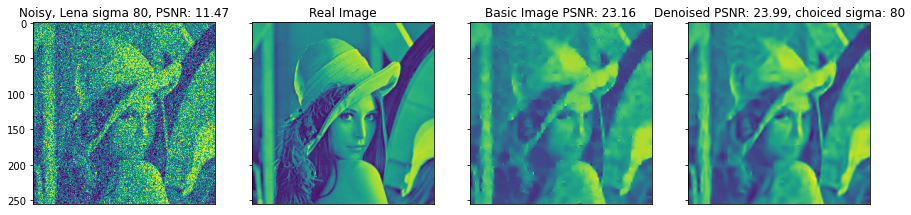

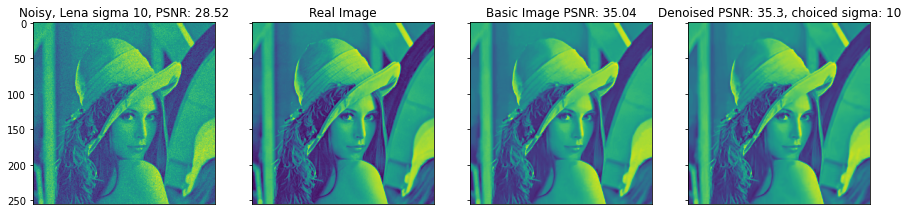

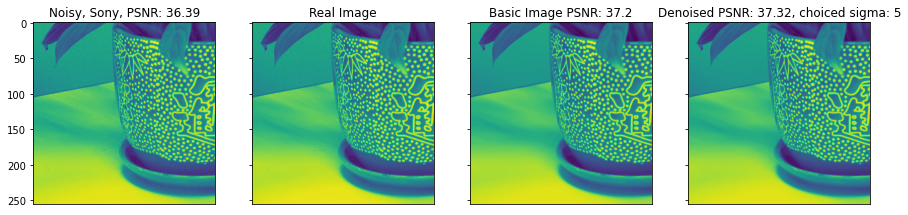

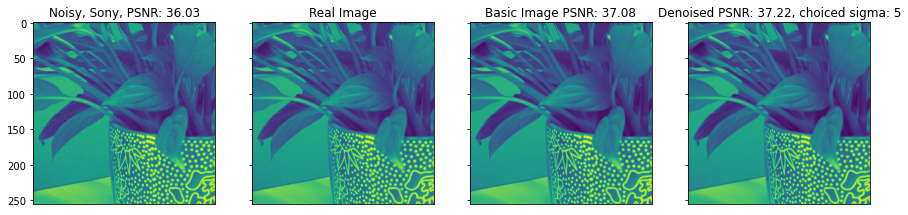

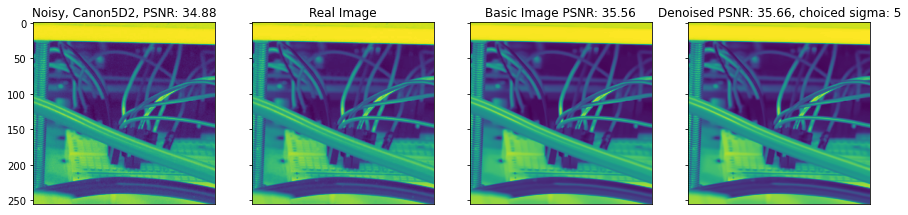

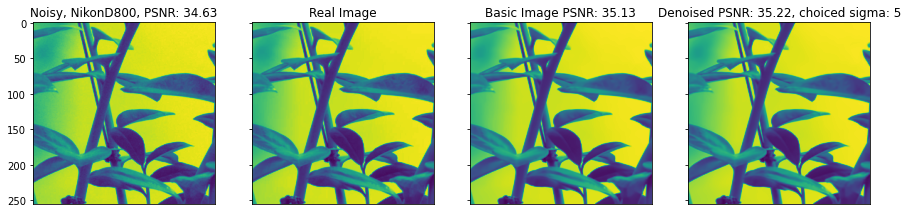

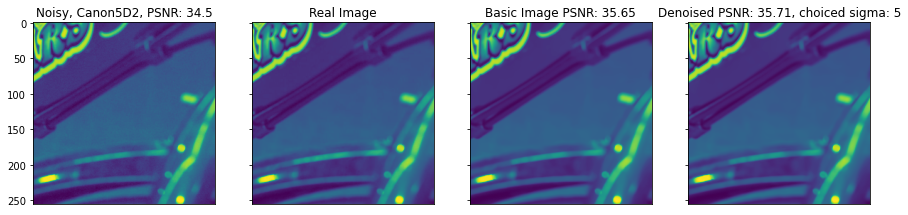

In [11]:
sigmas = [5, 10, 25, 50, 80]
for img_pair in images:
    img_noisy = cv2.imread(img_pair[1], cv2.IMREAD_GRAYSCALE)
    img_real = cv2.imread(img_pair[2], cv2.IMREAD_GRAYSCALE)
    if img_noisy.shape[0] > 300:
        img_noisy = cv2.resize(img_noisy, (256, 256)) 
        img_real = cv2.resize(img_real, (256, 256)) 
    psnrs = []
    for sigma in sigmas:
        tauMatch_H = 2500 if sigma < 35 else 5000  # ! threshold determinates similarity between patches
        tauMatch_W = 400 if sigma < 35 else 3500  # ! threshold determinates similarity between patches
        im1, im2 = run_bm3d(img_noisy, sigma,
                            n_H, k_H, N_H, p_H, tauMatch_H, useSD_H, tau_2D_H, lambda3D_H,
                            n_W, k_W, N_W, p_W, tauMatch_W, useSD_W, tau_2D_W)
        psnrs.append(compute_psnr(img_real, im2))
    sigma = np.array(sigmas)[np.argmax(psnrs)]
#     print(sigma, psnrs)
#     tauMatchHard = 2500 if sigma < 35 else 5000  # ! threshold determinates similarity between patches    
#     img_noisy_p = symetrize(img_noisy, nHard)
#     img_basic = bm3d_1st_step(sigma, img_noisy_p, nHard, kHard, NHard, pHard, lambdaHard3D, tauMatchHard, useSD_h,
#                               tau_2D_hard)
#     img_basic = img_basic[nHard: -nHard, nHard: -nHard]
    tauMatch_H = 2500 if sigma < 35 else 5000  # ! threshold determinates similarity between patches
    tauMatch_W = 400 if sigma < 35 else 3500  # ! threshold determinates similarity between patches
    im1, im2 = run_bm3d(img_noisy, sigma,
                        n_H, k_H, N_H, p_H, tauMatch_H, useSD_H, tau_2D_H, lambda3D_H,
                        n_W, k_W, N_W, p_W, tauMatch_W, useSD_W, tau_2D_W)
    f, axs = plt.subplots(1, 4, sharey=True, figsize=(15, 10))
    axs[0].imshow(img_noisy)
    axs[0].set_title(f'Noisy, {img_pair[0].split("_")[0]}, PSNR: {round(compute_psnr(img_real, img_noisy), 2)}')
    axs[0].set_xticks([], [])
    axs[1].imshow(img_real)
    axs[1].set_title('Real Image')
    axs[1].set_xticks([], [])
    axs[2].imshow(im1)
    axs[2].set_title(f'Basic Image PSNR: {round(compute_psnr(img_real, im1), 2)}')
    axs[2].set_xticks([], [])
    axs[3].imshow(im2)
    axs[3].set_title(f'Denoised PSNR: {round(float(np.max(psnrs)), 2)}, choiced sigma: {sigma}')
    axs[3].set_xticks([], [])
    plt.show()